# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [231]:
# import libraries here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
# your code here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [3]:
# your code here
temp.head(20)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [4]:
# your code here
temp.dtypes
# objects and float for Temperature

City            object
State           object
Temperature    float64
dtype: object

In [5]:
"""
your comments here
"""

'\nyour comments here\n'

#### Select the rows where state is New York.

In [6]:
# your code here
# creating a boolean mask and storing it in 'NYonly' column
temp['NYonly'] = temp['State'] == 'New York'

In [7]:
temp.head(10)

,City,State,Temperature,NYonly
0,NYC,New York,19.444444,True
1,Albany,New York,9.444444,True
2,Buffalo,New York,3.333333,True
3,Hartford,Connecticut,17.222222,False
4,Bridgeport,Connecticut,14.444444,False
5,Treton,New Jersey,22.222222,False
6,Newark,New Jersey,20.000000,False


In [8]:
# selecting rows based on a boolean mask
# True values represent New York
filtered = temp[(temp['NYonly']==True)]

In [9]:
filtered.head(10)

,City,State,Temperature,NYonly
0,NYC,New York,19.444444,True
1,Albany,New York,9.444444,True
2,Buffalo,New York,3.333333,True


#### What is the average temperature of cities in New York?

In [10]:
# your code here
print(filtered['Temperature'].mean())

10.74074074074074


#### Which states and cities have a temperature above 15 degrees Celsius?

In [11]:
# your code here
# creating a boolean mask to filter temperature > 15
temp['high_temp'] = temp['Temperature'] > 15

In [12]:
# selecting the rows that correspond to True from the boolean mask and storing the new dataframe in filtered_temp
filtered_temp = temp[(temp['high_temp']==True)]

In [13]:
filtered_temp.head()

,City,State,Temperature,NYonly,high_temp
0,NYC,New York,19.444444,True,True
3,Hartford,Connecticut,17.222222,False,True
5,Treton,New Jersey,22.222222,False,True
6,Newark,New Jersey,20.000000,False,True


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [14]:
# your code here
# creating for loops to print city and state 
# creating two empty lists: city and state to store the values
city = []
state = []
for i in filtered_temp['City']:
    city.append(i)
print(city)

for i in filtered_temp['State']:
    state.append(i)
print(state)

['NYC', 'Hartford', 'Treton', 'Newark']
['New York', 'Connecticut', 'New Jersey', 'New Jersey']


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [15]:
# your code here
# since we already have a DataFrame with cities and states with temp > 15 we will just remove the states with temp < 20
filtered_temp.head()

,City,State,Temperature,NYonly,high_temp
0,NYC,New York,19.444444,True,True
3,Hartford,Connecticut,17.222222,False,True
5,Treton,New Jersey,22.222222,False,True
6,Newark,New Jersey,20.000000,False,True


In [16]:
filtered_temp['high_20'] = filtered_temp['Temperature'] <= 20

/var/folders/gc/mj5dmy5j337_b7pqdtskrhnc0000gn/T/ipykernel_85358/1539642594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_temp['high_20'] = filtered_temp['Temperature'] <= 20


In [17]:
filtered_temp.head()

,City,State,Temperature,NYonly,high_temp,high_20
0,NYC,New York,19.444444,True,True,True
3,Hartford,Connecticut,17.222222,False,True,True
5,Treton,New Jersey,22.222222,False,True,False
6,Newark,New Jersey,20.000000,False,True,True


In [18]:
filtered_20 = filtered_temp[(filtered_temp['high_20']==True)]

In [19]:
filtered_20.head()

,City,State,Temperature,NYonly,high_temp,high_20
0,NYC,New York,19.444444,True,True,True
3,Hartford,Connecticut,17.222222,False,True,True
6,Newark,New Jersey,20.000000,False,True,True


#### Find the mean and standard deviation of the temperature of each state.

In [20]:
# your code here
temp.head()

,City,State,Temperature,NYonly,high_temp
0,NYC,New York,19.444444,True,True
1,Albany,New York,9.444444,True,False
2,Buffalo,New York,3.333333,True,False
3,Hartford,Connecticut,17.222222,False,True
4,Bridgeport,Connecticut,14.444444,False,False


In [21]:
# filtered dataframe has already New York state only. We will use it for the calculations
filtered.head()

,City,State,Temperature,NYonly
0,NYC,New York,19.444444,True
1,Albany,New York,9.444444,True
2,Buffalo,New York,3.333333,True


In [22]:
print('Mean temperature in NY state is: ',filtered['Temperature'].mean())
print(filtered['Temperature'].std())

Mean temperature in NY state is:  10.74074074074074
8.133404168888054


In [23]:
# creating boolean masks for all states to use for filtering at later stage
# after creating the boolean mask the rows corresponding to each state will be stored in seperate dataframes
temp['Conly'] = temp['State'] == 'Connecticut'
temp['NJonly'] = temp['State'] == 'New Jersey'

In [24]:
connecticut = temp[(temp['Conly']==True)]

In [25]:
new_jersey = temp[(temp['NJonly']==True)]

In [26]:
print('Mean temperature in Connecticut state is: ',connecticut['Temperature'].mean())
print('Standard deviation: ',connecticut['Temperature'].std())

Mean temperature in Connecticut state is:  15.833333333333332
Standard deviation:  1.9641855032959645


In [27]:
print('Mean temperature in New Jersey state is: ',new_jersey['Temperature'].mean())
print('Standard deviation: ',new_jersey['Temperature'].std())

Mean temperature in New Jersey state is:  21.11111111111111
Standard deviation:  1.5713484026367717


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [28]:
# your code here

#### Explore the data types of the `employees` dataframe. Comment your results.

In [29]:
# your code here

In [30]:
"""
your comments here
"""

'\nyour comments here\n'

#### What's the average salary in this company?

In [31]:
# your code here

#### What's the highest salary?

In [32]:
# your code here

#### What's the lowest salary?

In [33]:
# your code here

#### Who are the employees with the lowest salary?

In [34]:
# your code here

#### Find all the information about an employee called David.

In [35]:
# your code here

#### Could you return only David's salary?

In [36]:
# your code here

#### Print all the rows where job title is associate.

In [37]:
# your code here

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [38]:
# Method 1
# your code here

In [39]:
# Method 2
# your code here

#### Find the employees whose title is associate and whose salary is above 55.

In [40]:
# your code here

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [41]:
# your code here

####  What is the average salary per title?

In [42]:
# your code here

####  Find the salary quartiles.


In [43]:
# your code here

#### Is the mean salary different per gender?

In [44]:
# your code here

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [45]:
# your code here

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [46]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [47]:
# your code here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [48]:
# your code here
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [49]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [50]:
orders.shape

(397924, 14)

In [51]:
orders.isnull().sum()

Unnamed: 0      0
InvoiceNo       0
StockCode       0
year            0
month           0
day             0
hour            0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
amount_spent    0
dtype: int64

In [52]:
"""
your comments here
We have: int, obect, float types
we have: (397924 rows, 14 columns)
there are no NaN values in the table
"""

'\nyour comments here\nWe have: int, obect, float types\nwe have: (397924 rows, 14 columns)\nthere are no NaN values in the table\n'

####  What is the average purchase price?

In [53]:
# your code here
print('The average purchase price is ',orders['amount_spent'].mean())

The average purchase price is  22.39474850474768


#### What are the highest and lowest purchase prices? 

In [70]:
# your code here
# running min() and max() on amount_spent
print('The highest purchase is ',orders['amount_spent'].max())
print('The lowest purchase is ',orders['amount_spent'].min())

The highest purchase is  168469.6
The lowest purchase is  0.0


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [99]:
# your code here
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [71]:
spain = orders[['CustomerID', 'Country']]

In [74]:
# removind duplicates so there is one unique CustomerID per country 
spain.drop_duplicates()

,CustomerID,Country
0,17850,United Kingdom
9,13047,United Kingdom
26,12583,France
46,13748,United Kingdom
65,15100,United Kingdom
...,...,...
394965,13436,United Kingdom
395041,15520,United Kingdom
395777,13298,United Kingdom
396506,14569,United Kingdom


In [76]:
spain['Spain'] = spain['Country'] == 'Spain'

/var/folders/gc/mj5dmy5j337_b7pqdtskrhnc0000gn/T/ipykernel_85358/853593144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain['Spain'] = spain['Country'] == 'Spain'


In [77]:
spain.head()

,CustomerID,Country,Spain
0,17850,United Kingdom,False
1,17850,United Kingdom,False
2,17850,United Kingdom,False
3,17850,United Kingdom,False
4,17850,United Kingdom,False


In [78]:
# take the True values from the boolean mask to display customers from Spain
filtered_spain = spain[(spain['Spain']==True)]

In [82]:
# this dataframe displays all unique CustomerIDs from Spain by using drop_duplicates()
filtered_spain = filtered_spain.drop_duplicates()
filtered_spain

,CustomerID,Country,Spain
4250,12557,Spain,True
13974,17097,Spain,True
17368,12540,Spain,True
23288,12551,Spain,True
29804,12484,Spain,True
31390,12539,Spain,True
37428,12510,Spain,True
41390,12421,Spain,True
49687,12502,Spain,True
53374,12462,Spain,True


#### How many customers do we have in Spain?

In [171]:
# your code here
# we have 30 customers from Spain
print('There are: ',len(filtered_spain['CustomerID']))

There are:  30


#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [169]:
# your code here
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [105]:
# filtering the needed orders and storing them in fifty_orders 
fifty_orders = orders[['CustomerID', 'Quantity',]]

In [127]:
fifty_orders.head(10)

,CustomerID,Quantity
0,17850,6
1,17850,6
2,17850,8
3,17850,6
4,17850,6
5,17850,2
6,17850,6
7,17850,6
8,17850,6
9,13047,32


In [172]:
# sorting the orders based on CustomerID
fifty_orders = fifty_orders.sort_values(by=['CustomerID'], ignore_index=True)

In [182]:
fifty_orders.head()

,CustomerID,Quantity
0,12346,74215
1,12347,12
2,12347,4
3,12347,6
4,12347,8


In [174]:
# creating a nested list using from the column CustomerID
s = fifty_orders.groupby('CustomerID')['Quantity'].apply(lambda x: x.tolist())

In [185]:
#print(s.to_dict())

In [193]:
result = {}
for k, v in s.items():
    result[k] = sum(v)

#print(result)

In [177]:
over_50_orders = {}
for k,v in result.items():
    if v > 50:
        over_50_orders[k] = v
    else:
        continue
print('Customers with more than 50 items ordered: ',len(over_50_orders))

Customers with more than 50 items ordered:  4091


In [196]:
#pd.DataFrame.from_dict(over_50_orders, orient='index',columns=['CustomerID', 'Quantity'])
# this did not work so I am commenting it out and using a different approach

In [200]:
# taking the over_50_orders dict() and creating two seperate lists for key and values
# will be using the lists to then create a dataframe where each list will be a column
cutomerID = []
order =[] 

for k,v in over_50_orders.items():
    cutomerID.append(k)
    order.append(v)

In [201]:
# creating the dataframe df from both lists
df = pd.DataFrame(list(zip(cutomerID, order)),
               columns =['cutomerID', 'orders'])

In [202]:
df.head()

,cutomerID,orders
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197


#### Select orders from Spain that include more than 50 items.

In [207]:
# your code here
temp = orders[['CustomerID','Quantity', 'Country']]

In [208]:
temp.head()

,CustomerID,Quantity,Country
0,17850,6,United Kingdom
1,17850,6,United Kingdom
2,17850,8,United Kingdom
3,17850,6,United Kingdom
4,17850,6,United Kingdom


In [209]:
spain_50 = temp.sort_values(by=['CustomerID'], ignore_index=True)

In [214]:
spain_50['Spain'] = spain_50['Country'] == 'Spain'

In [215]:
filtered_50 = spain_50[(spain_50['Spain']==True)]

In [222]:
# from here I am using the same code as previos question

In [217]:
sa = filtered_50.groupby('CustomerID')['Quantity'].apply(lambda x: x.tolist())

In [219]:
result_spain = {}
for k, v in sa.items():
    result_spain[k] = sum(v)

#print(result)

In [221]:
over_50_spain = {}
for k,v in result_spain.items():
    if v > 50:
        over_50_spain[k] = v
    else:
        continue
print('Customers with more than 50 items ordered FROM SPAIN: ',len(over_50_spain))

Customers with more than 50 items ordered FROM SPAIN:  29


#### Select all free orders.

In [223]:
# your code here
# did not understand the question
# there is one order where the amount_spent is zero
print('The lowest purchase is ',orders['amount_spent'].min())

The lowest purchase is  0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [248]:
# your code here


#### Select all `lunch bag` orders made in 2011.

In [63]:
# your code here

#### Show the frequency distribution of the amount spent in Spain.

In [252]:
count = orders[orders['Country']=='Spain']

In [300]:
count.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


In [307]:
count = count.sort_values(by='amount_spent', ascending=False, ignore_index=True)

In [308]:
histogram_sample = count[['Country', 'amount_spent']]

array([[<AxesSubplot:title={'center':'amount_spent'}>]], dtype=object)

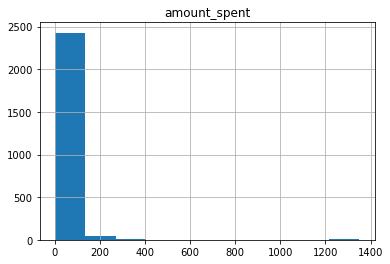

In [310]:
histogram_sample.hist()

#### Select all orders made in the month of August.

In [242]:
# your code here


In [243]:
orders[orders['month']==8].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [278]:
# your code here
august = orders[orders['month']==8]
august['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [318]:
# your code here
orders.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [68]:
# your code here

#### What is the average amount spent per year?

In [69]:
# your code here